In [32]:
!pip3 install lightgbm
!pip3 install pymorphy3

In [33]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from warnings import filterwarnings
filterwarnings("ignore")
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/egor/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/egor/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/egor/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/egor/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/egor/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package ave

True

# CountVectorizer

In [34]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

Возможно ли сделать модель суммаризации текста без нейронных сетей? только sklearn?

In [35]:
corpus = [
    "This is the first document",
    "This document is the second document.",
    "And this is the third one.",
    "Is that a first document?"
] 

In [36]:
words = []
stop_words = stopwords.words("english")
for sentence in corpus:
    sentence = sentence.split(" ")
    for word in sentence:
        word = word.lower()
        if word not in words and word not in stop_words:
            words.append(word)
print(len(words), words)

7 ['first', 'document', 'second', 'document.', 'third', 'one.', 'document?']


In [37]:
vectorizer = CountVectorizer(max_features=100, analyzer="word", ngram_range=(1, 3), stop_words="english")
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['document' 'document second' 'document second document' 'second'
 'second document']
[[1 0 0 0 0]
 [2 1 1 1 1]
 [0 0 0 0 0]
 [1 0 0 0 0]]


In [38]:
vectorizer = CountVectorizer(max_features=100, analyzer="word", ngram_range=(1, 3)) # stop_words="english",
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'and this' 'and this is' 'document' 'document is' 'document is the'
 'first' 'first document' 'is' 'is that' 'is that first' 'is the'
 'is the first' 'is the second' 'is the third' 'one' 'second'
 'second document' 'that' 'that first' 'that first document' 'the'
 'the first' 'the first document' 'the second' 'the second document'
 'the third' 'the third one' 'third' 'third one' 'this' 'this document'
 'this document is' 'this is' 'this is the']
[[0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1]
 [0 0 0 2 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0]
 [1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1]
 [0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [39]:
bag_of_word_df = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out())
bag_of_word_df.head()

,and,and this,and this is,document,document is,document is the,first,first document,is,is that,...,the second document,the third,the third one,third,third one,this,this document,this document is,this is,this is the
0,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,2,1,1,0,0,1,0,...,1,0,0,0,0,1,1,1,0,0
2,1,1,1,0,0,0,0,0,1,0,...,0,1,1,1,1,1,0,0,1,1
3,0,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
bag_of_word_df.shape

(4, 35)

# TFIDF

In [41]:
vectorizer = TfidfVectorizer(max_features=100, ngram_range=(1, 3), analyzer="word")
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'and this' 'and this is' 'document' 'document is' 'document is the'
 'first' 'first document' 'is' 'is that' 'is that first' 'is the'
 'is the first' 'is the second' 'is the third' 'one' 'second'
 'second document' 'that' 'that first' 'that first document' 'the'
 'the first' 'the first document' 'the second' 'the second document'
 'the third' 'the third one' 'third' 'third one' 'this' 'this document'
 'this document is' 'this is' 'this is the']
[[0.         0.         0.         0.23482421 0.         0.
  0.29005462 0.29005462 0.19198418 0.         0.         0.23482421
  0.3678975  0.         0.         0.         0.         0.
  0.         0.         0.         0.23482421 0.3678975  0.3678975
  0.         0.         0.         0.         0.         0.
  0.23482421 0.         0.         0.29005462 0.29005462]
 [0.         0.         0.         0.36662294 0.28719284 0.28719284
  0.         0.         0.14986914 0.         0.         0.18331147
  0.         0.28719284 0.         

In [42]:
word_weight_df = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out())
word_weight_df.head()

,and,and this,and this is,document,document is,document is the,first,first document,is,is that,...,the second document,the third,the third one,third,third one,this,this document,this document is,this is,this is the
0,0.000000,0.000000,0.000000,0.234824,0.000000,0.000000,0.290055,0.290055,0.191984,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.234824,0.000000,0.000000,0.290055,0.290055
1,0.000000,0.000000,0.000000,0.366623,0.287193,0.287193,0.000000,0.000000,0.149869,0.000000,...,0.287193,0.000000,0.000000,0.000000,0.000000,0.183311,0.287193,0.287193,0.000000,0.000000
2,0.291882,0.291882,0.291882,0.000000,0.000000,0.000000,0.000000,0.000000,0.152316,0.000000,...,0.000000,0.291882,0.291882,0.291882,0.291882,0.186305,0.000000,0.000000,0.230123,0.230123
3,0.000000,0.000000,0.000000,0.242589,0.000000,0.000000,0.299646,0.299646,0.198333,0.380063,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Классификация токсичных комментариев

In [43]:
import pymorphy3
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

In [44]:
morph = pymorphy3.MorphAnalyzer()
print(morph.parse("Обучениями учеников",)[0].normal_form)

обучениями ученик


In [78]:
comments_df = pd.read_csv("labeled.csv")
comments_df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [79]:
comments_df.shape

(14412, 2)

In [80]:
def normal_form(text):
    return morph.parse(text)[0].normal_form

In [81]:
def remove_punkt(text):
    text = re.sub("^A-Za-z", "", text)
    return text

In [82]:
comments_df["comment"] = comments_df["comment"].apply(remove_punkt)
comments_df["comment"] = comments_df["comment"].apply(normal_form)

In [108]:
vectorizer = TfidfVectorizer(analyzer="word", ngram_range=(1, 3), stop_words="english", encoding="utf-8")
X = vectorizer.fit_transform(comments_df["comment"])
y = comments_df["toxic"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
print(X_train.shape)

(10088, 641651)


In [94]:
model = LGBMClassifier(n_estimators=1000, min_samples_leaf=20, min_samples_split=20, max_depth=4, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 3399, number of negative: 6689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39510
[LightGBM] [Info] Number of data points in the train set: 10088, number of used features: 1497
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336935 -> initscore=-0.676983
[LightGBM] [Info] Start training from score -0.676983
[LightGBM] [Warning] No f

0.8152173913043478

In [95]:
y_pred = model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: min_samples_split


In [96]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      2897
         1.0       0.78      0.62      0.69      1427

    accuracy                           0.82      4324
   macro avg       0.80      0.77      0.78      4324
weighted avg       0.81      0.82      0.81      4324



In [175]:
def get_model_predict(text: str, vectorizer, model) -> int:
    text = text.split(" ")
    text = [normal_form(i) for i in text]
    text = [remove_punkt(i) for i in text]
    processed_text = " ".join(text)
    print(processed_text)
    X = vectorizer.transform([processed_text])
    return model.predict(X.toarray())    

In [176]:
get_model_predict("КОТИКИ СОЖГУТ ВЕСЬ МИР!", vectorizer=vectorizer, model=model)

котик сжечь весь мир!
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: min_samples_split


array([1.])

# Классификация спама

In [121]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip

--2024-09-17 22:31:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z     [    <=>             ] 198.65K   227KB/s    in 0.9s    

2024-09-17 22:31:06 (227 KB/s) - ‘smsspamcollection.zip’ saved [203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [252]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

import seaborn
seaborn.set_theme()

In [253]:
spam_df = pd.read_table('SMSSpamCollection', sep='\t', header=None, names=['label','message'])
spam_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

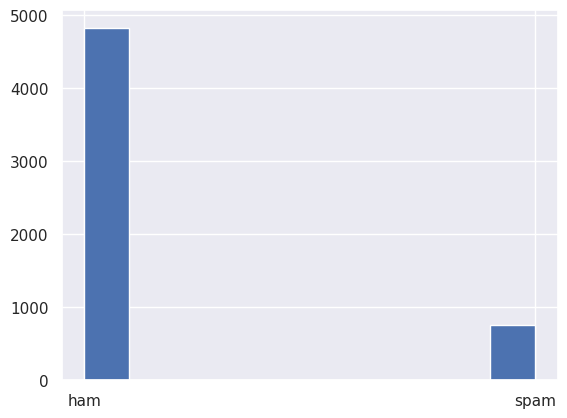

In [254]:
spam_df["label"].hist()

In [255]:
rus = RandomUnderSampler()
X_resample, y_resample = rus.fit_resample(
    spam_df[["message"]],
    spam_df["label"]
)
y_resample.shape

(1494,)

In [256]:
le = LabelEncoder()
y_resample = le.fit_transform(y_resample)
y_resample[10:15]

array([0, 0, 0, 0, 0])

In [257]:
print(le.inverse_transform([0]), le.inverse_transform([1]))

['ham'] ['spam']


In [258]:
X_resample.shape, y_resample.shape

((1494, 1), (1494,))

In [259]:
df = pd.DataFrame({
    "message": X_resample["message"],
    "label": y_resample
})
df.head()

,message,label
4385,Thanks honey but still haven't heard anything ...,0
875,Talk With Yourself Atleast Once In A Day...!!!...,0
1971,Nvm it's ok...,0
304,He is a womdarfull actor,0
3137,Can you let me know details of fri when u find...,0


<Axes: >

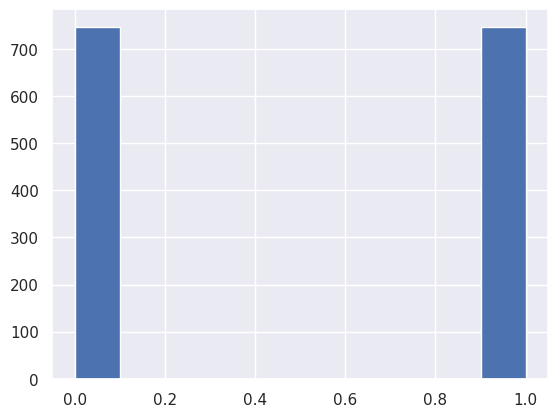

In [260]:
df["label"].hist()

In [261]:
df.shape

(1494, 2)

In [269]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["message"]).toarray()
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [270]:
model = LGBMClassifier(n_estimators=1000, min_samples_leaf=20, min_samples_split=20, max_depth=4, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 599, number of negative: 596
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3527
[LightGBM] [Info] Number of data points in the train set: 1195, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501255 -> initscore=0.005021
[LightGBM] [Info] Start training from score 0.005021
[LightGBM] [Warning] No further 

0.9431438127090301

In [271]:
y_pred = model.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: min_samples_split
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       151
           1       0.97      0.91      0.94       148

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299

